# XP Data Science - Semana 3 - Análise Exploratória

# Importando os dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import pandas_profiling
%matplotlib inline

- *%matplotlib inline* - Retorna os gráficos sem precisar chamar *plt.show()*

# Carregar os dados


In [2]:
df = pd.read_csv('winequality-white.csv',sep=';')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

- Dados separados por *;*
- Comando *head()* retorna os primeiros 5 linhas da tabela

# Visualizando

## Box Splot

In [8]:
#Tamanho do plot
fig_size = (15,10)

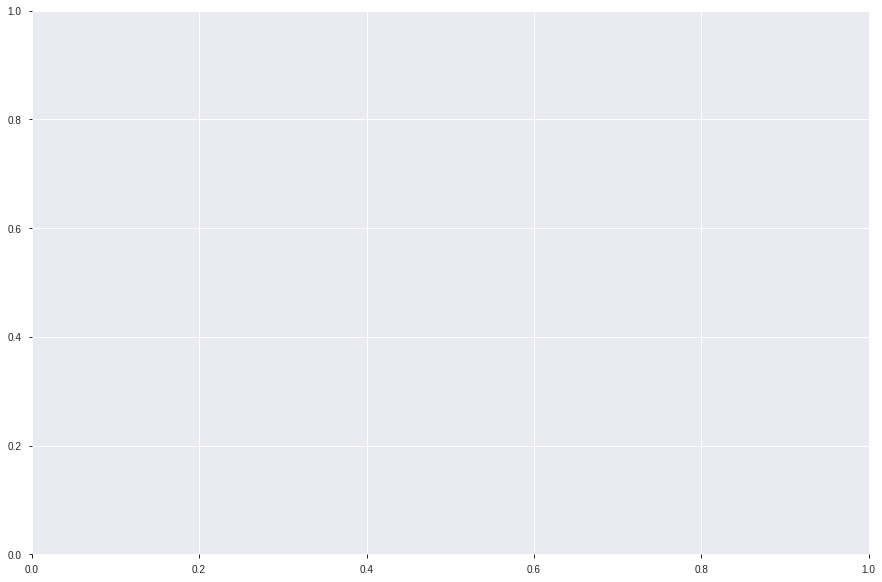

In [11]:
#Tamanho da figura 
plt.subplots(figsize=fig_size)
plt.show()

- Define o tamanaho da figura a ser exibida

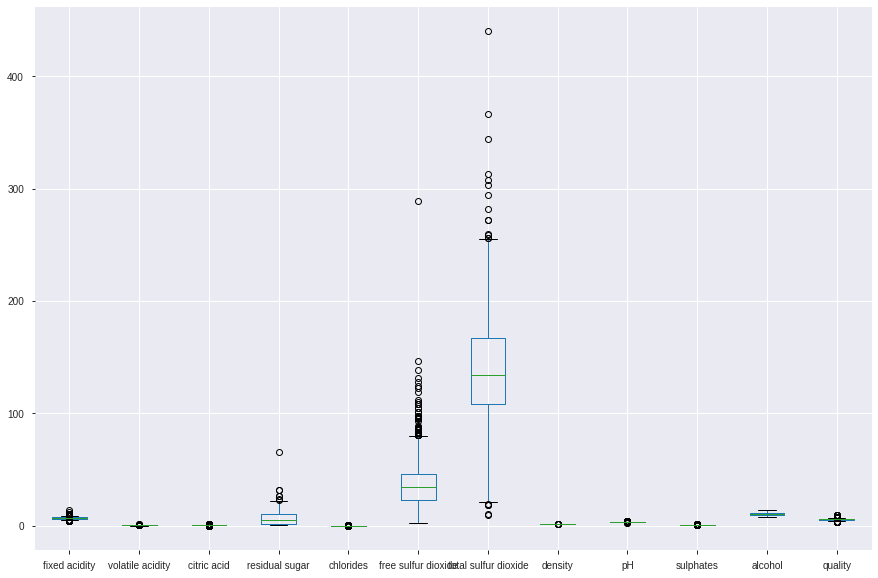

In [12]:
#Todo o dataframe
df.boxplot(figsize=fig_size)

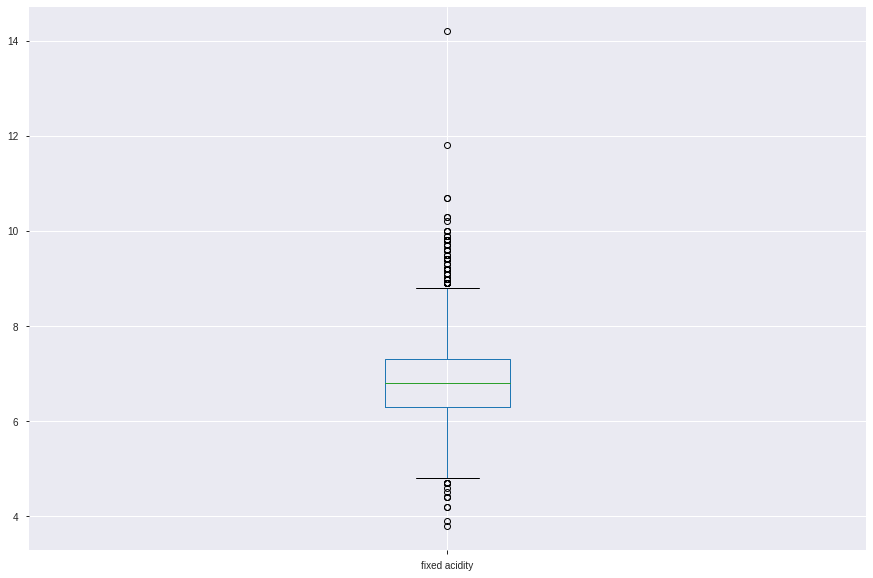

In [13]:
#Apenas uma coluna
df.boxplot(column="fixed acidity",figsize=fig_size)

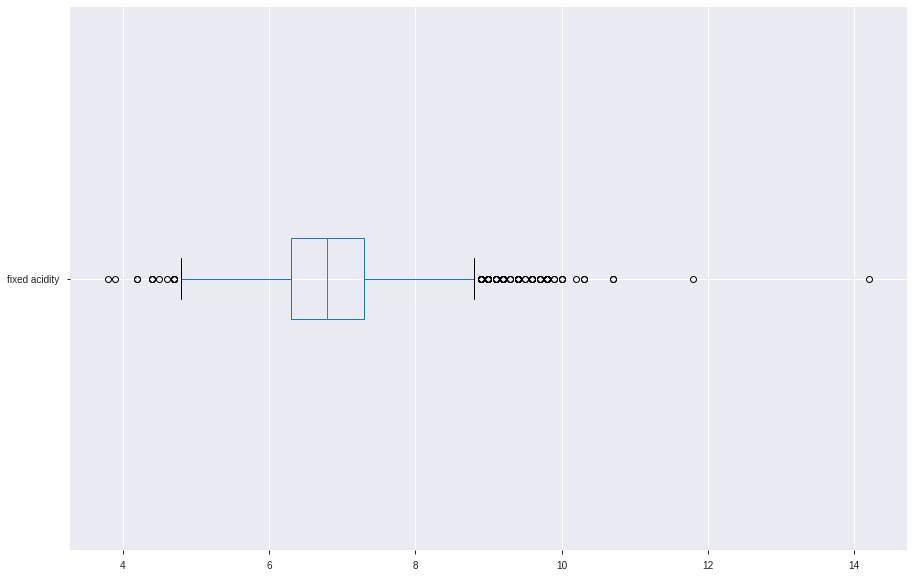

In [14]:
#Na vertical
df.boxplot(column="fixed acidity",figsize=fig_size,vert=False)

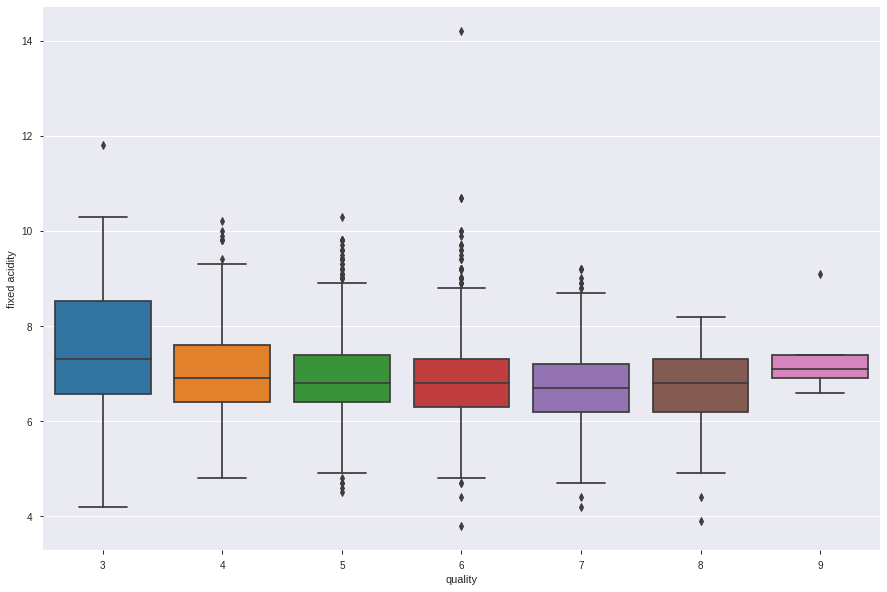

In [15]:
#Comparando
plt.subplots(figsize=fig_size)
sns.boxplot(x="quality", y="fixed acidity", data=df)

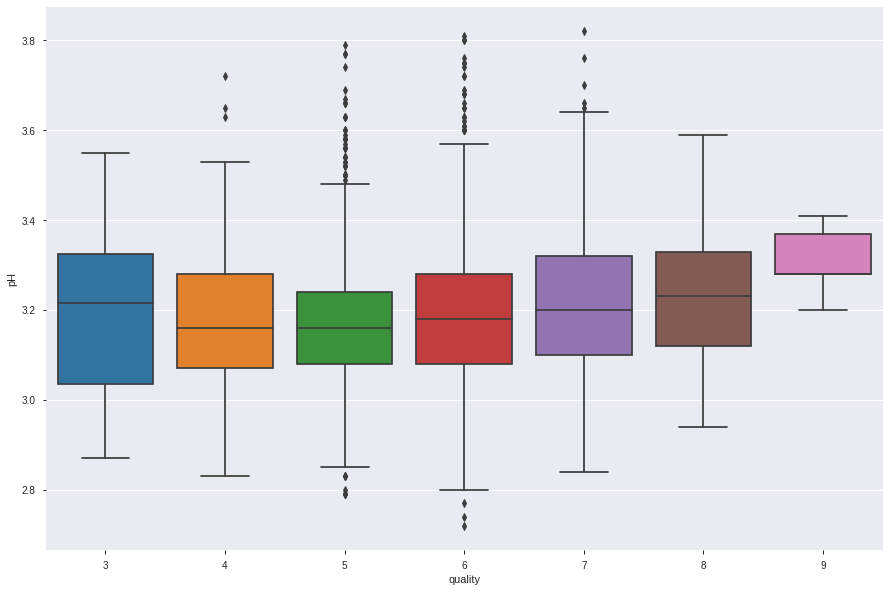

In [16]:
#Comparando
plt.subplots(figsize=fig_size)
sns.boxplot(x="quality", y="pH", data=df)

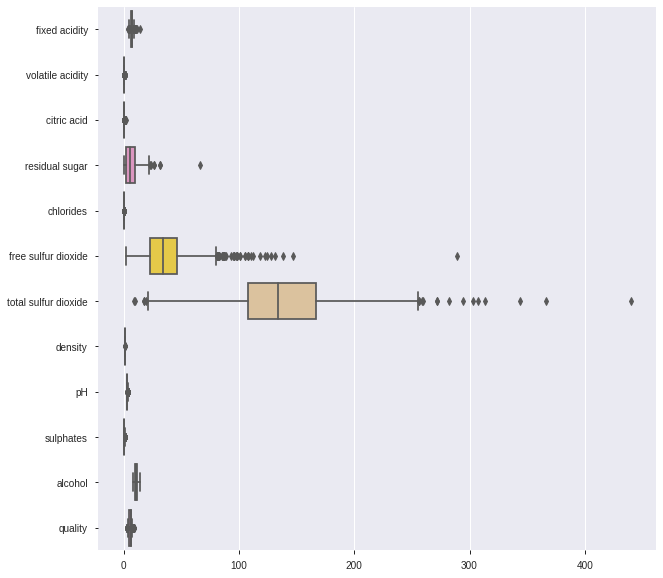

In [17]:
#Comparando observações
plt.subplots(figsize=(10,10))
sns.boxplot(data=df, orient="h", palette="Set2")

In [18]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

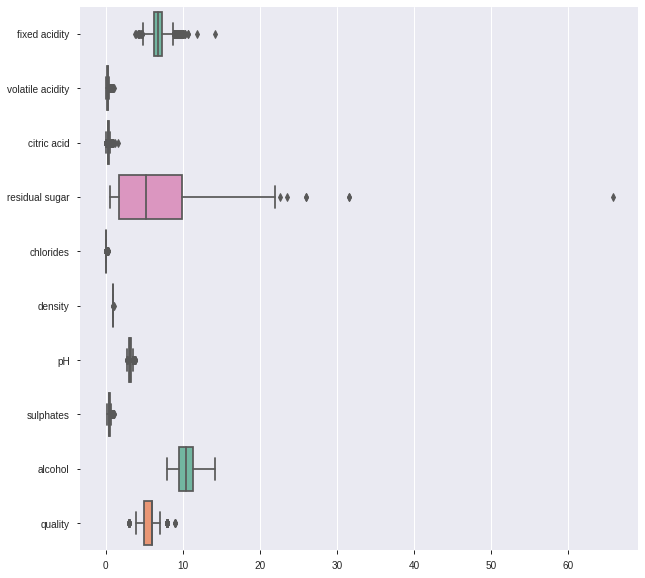

In [27]:
plt.subplots(figsize=(10,10))
sns.boxplot(data=df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']], orient="h", palette="Set2")

In [29]:
#Dataframe de gorjeta de testes dentro do seaborn
tips = sns.load_dataset("tips")
tips.head(3)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3

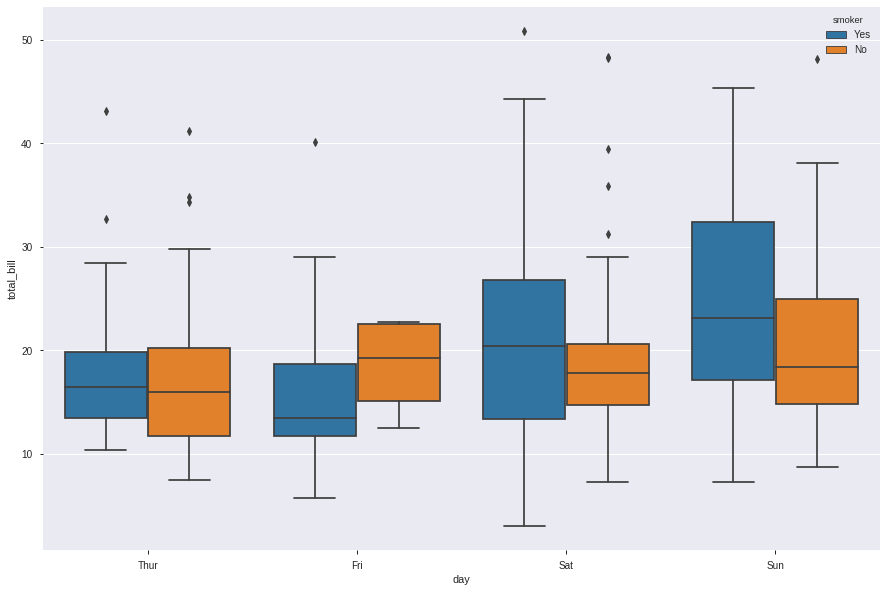

In [30]:
#Total da conta por dia e fumantes
plt.subplots(figsize=fig_size)
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips)
plt.show()

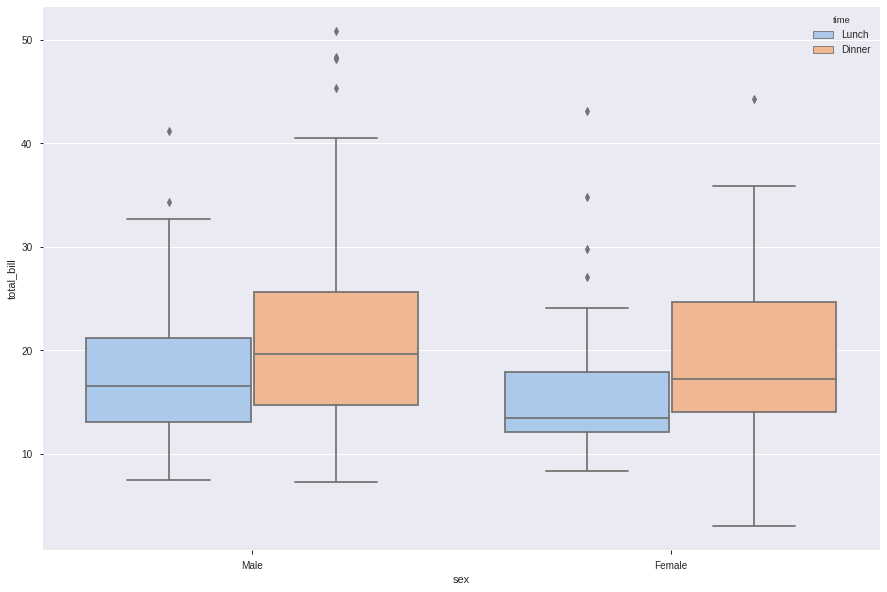

In [31]:
#Total da conta por evento e sexo
plt.subplots(figsize=fig_size)
sns.boxplot(x="sex", y="total_bill", hue="time",data=tips,palette="pastel")
plt.show()

* Escolha de cores https://seaborn.pydata.org/tutorial/color_palettes.html

## Histograma

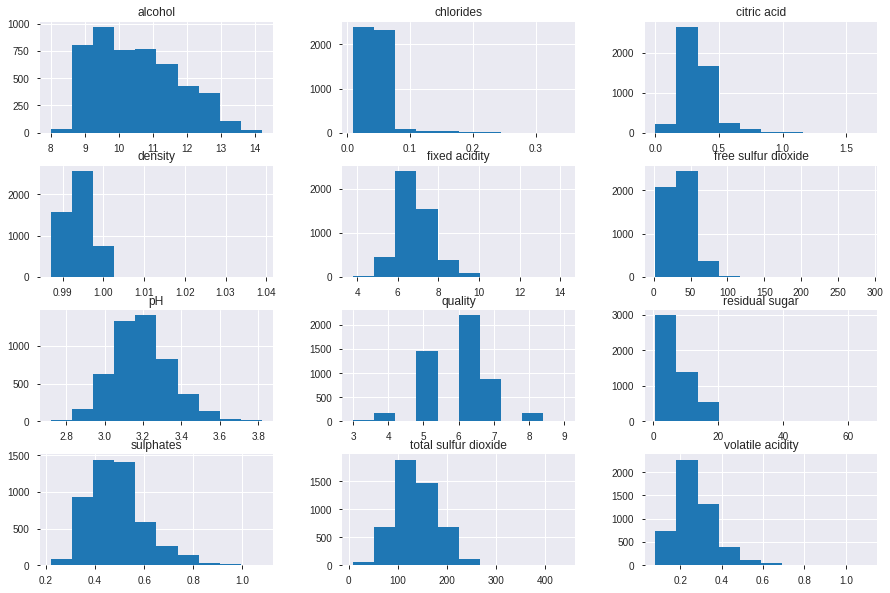

In [32]:
#Histograma de todo DataFrame
df.hist(figsize=fig_size)
plt.show()

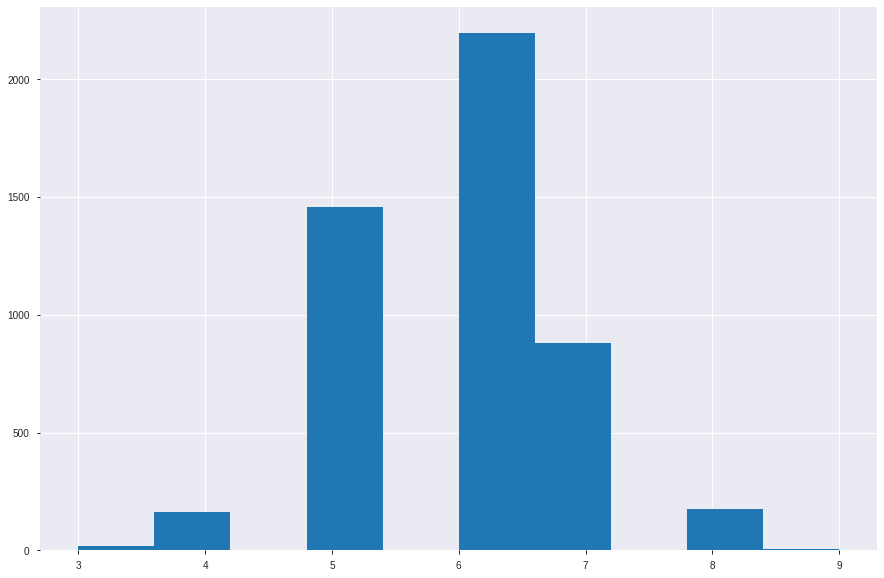

In [33]:
#De apenas uma variavel
df.quality.hist(figsize=fig_size)
plt.show()

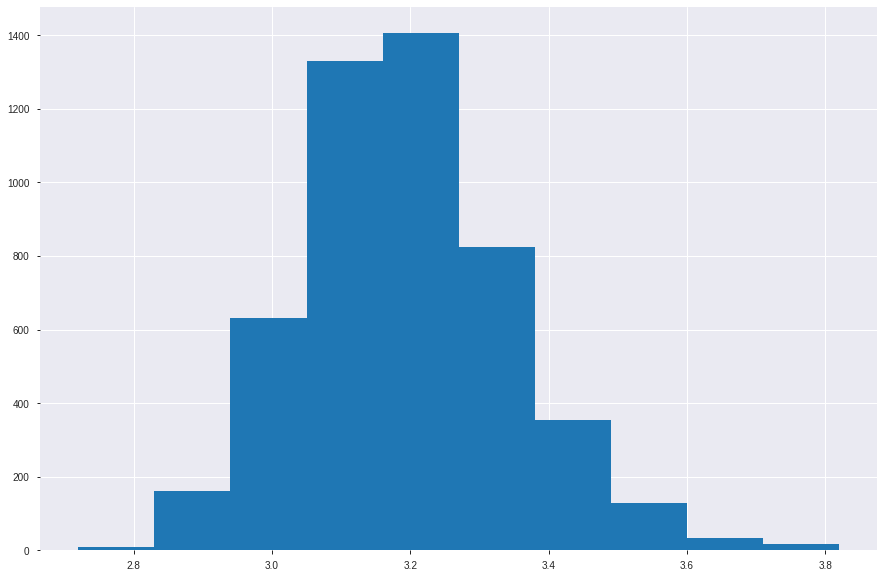

In [34]:
#Outra Variavel
df.pH.hist(figsize=fig_size)
plt.show()

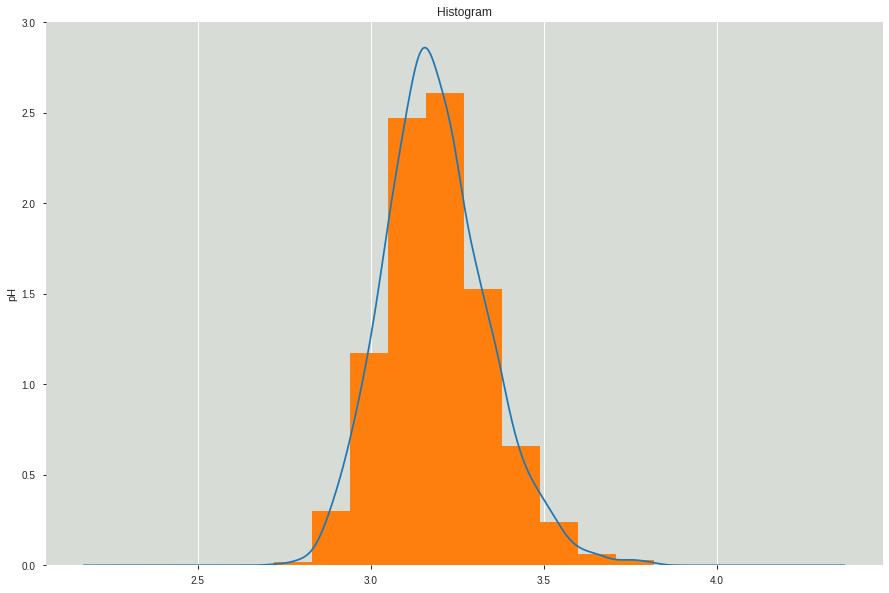

In [37]:
#Histograma com a densidade
fig, ax = plt.subplots(figsize=fig_size)
df.pH.plot.kde(ax=ax, legend=False, title='Histogram')
df.pH.plot.hist(density=True, ax=ax)
ax.set_ylabel('pH')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

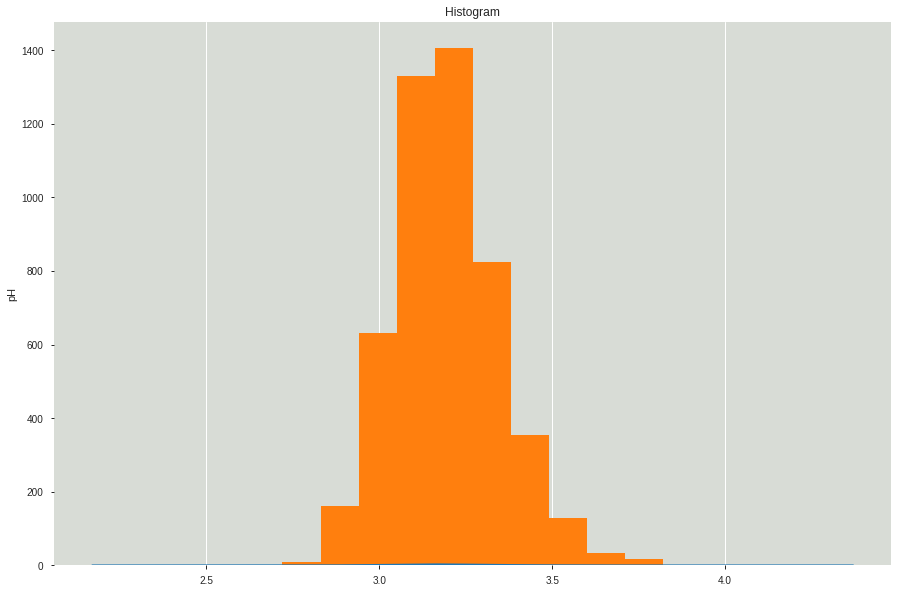

In [38]:
#Histograma com a densidade
fig, ax = plt.subplots(figsize=fig_size)
df.pH.plot.kde(ax=ax, legend=False, title='Histogram')
df.pH.plot.hist(density=False, ax=ax)
ax.set_ylabel('pH')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

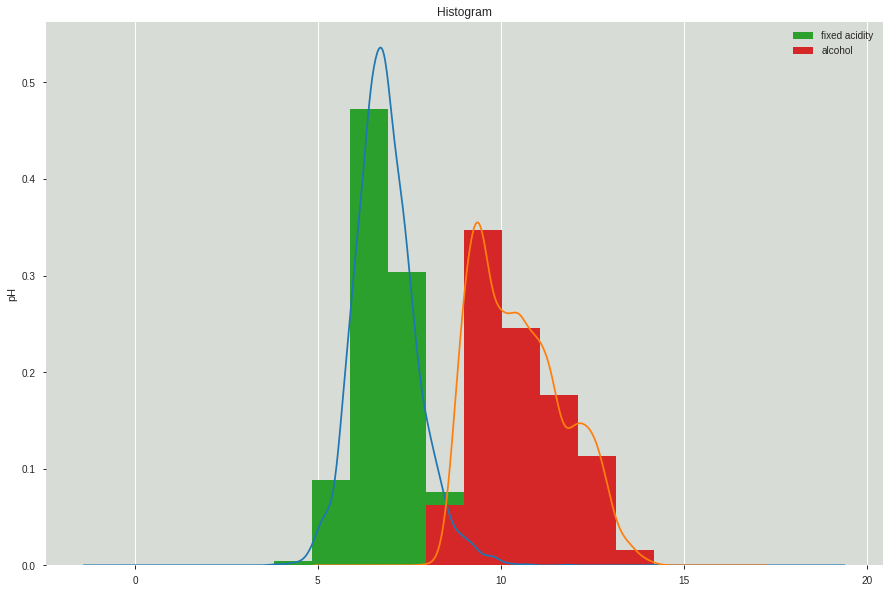

In [40]:
#Comparando duas features pela densidade
fig, ax = plt.subplots(figsize=fig_size)
df[["fixed acidity","alcohol"]].plot.kde(ax=ax, legend=False, title='Histogram')
df[["fixed acidity","alcohol"]].plot.hist(density=True, ax=ax)
ax.set_ylabel('pH')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

# Correlação e Dispersão

In [50]:
#Calculando a densidade de Pearson
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.089021   0.023086            -0.049396   
volatile acidity            0.064286   0.070512            -0.097012   
citric acid                 0.094212   0.114364             0.094077   
residual sugar              1.000000   0.088685             0.299098   
chlorides                   0.088685   1.000000             0.101392   
free sulfur dioxide         0.299098   0.101392             1.000000   
total sulfur dioxide        0.401439   0.198910             0.615501   
density                     0.838966   0.257211             0.294210   
pH                         -0.194133  -0.090439            -0.000618   
sulphates                  -0.026664   0.016763             0.059217   
alcohol                    -0.450631  -0.360189            -0.250104   
quality                    -0.097577  -0.209934             0.008158   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                     0.091070  0.265331 -0.425858  -0.017143   
volatile acidity                  0.089261  0.027114 -0.031915  -0.035728   
citric acid                       0.121131  0.149503 -0.163748   0.062331   
residual sugar                    0.401439  0.838966 -0.194133  -0.026664   
chlorides                         0.198910  0.257211 -0.090439   0.016763   
free sulfur dioxide               0.615501  0.294210 -0.000618   0.059217   
total sulfur dioxide              1.000000  0.529881  0.002321   0.134562   
density                           0.529881  1.000000 -0.093591   0.074493   
pH                                0.002321 -0.093591  1.000000   0.155951   
sulphates                         0.134562  0.074493  0.155951   1.000000   
alcohol                          -0.448892 -0.780138  0.121432  -0.017433   
quality                          -0.174737 -0.307123  0.099427   0.053678   

                       alcohol   quality  
fixed acidity        -0.120881 -0.113663  
volatile acidity      0.067718 -0.194723  
citric acid          -0.075729 -0.009209  
residual sugar       -0.450631 -0.097577  
chlorides            -0.360189 -0.209934  
free sulfur dioxide  -0.250104  0.008158  
total sulfur dioxide -0.448892 -0.174737  
density              -0.780138 -0.307123  
pH                    0.121432  0.099427  
sulphates            -0.017433  0.053678  
alcohol               1.000000  0.435575  
quality               0.435575  1.000000

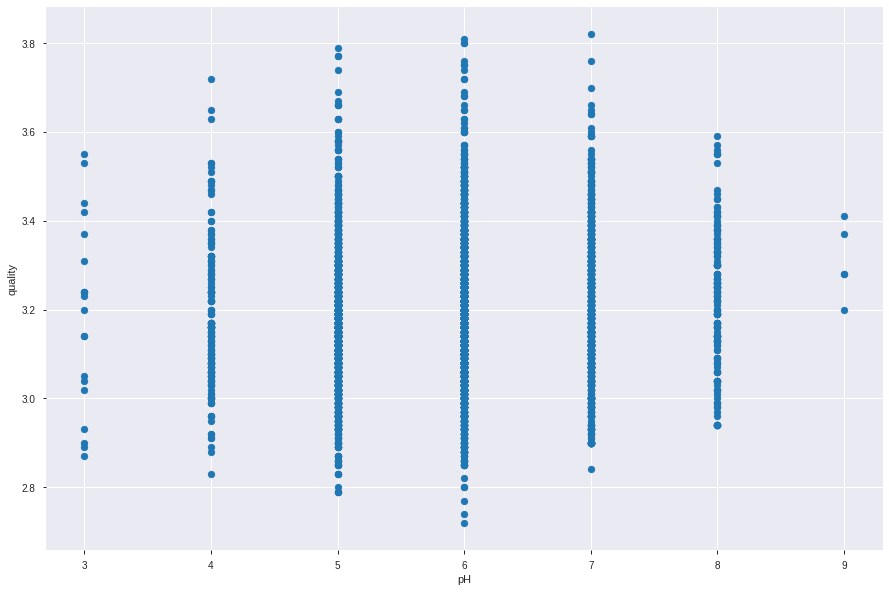

In [51]:
#Vendo as colunas
fig, ax = plt.subplots(figsize=fig_size)
plt.scatter(df.quality,df.pH)
plt.xlabel('pH')
plt.ylabel('quality')
plt.show()

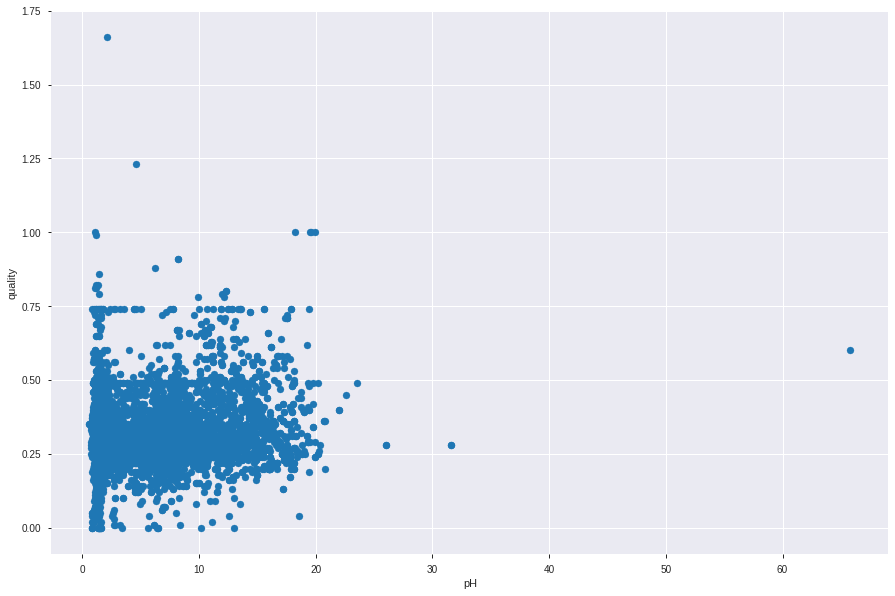

In [52]:
fig, ax = plt.subplots(figsize=fig_size)
plt.scatter(df["residual sugar"],df["citric acid"])
plt.xlabel('pH')
plt.ylabel('quality')
plt.show()

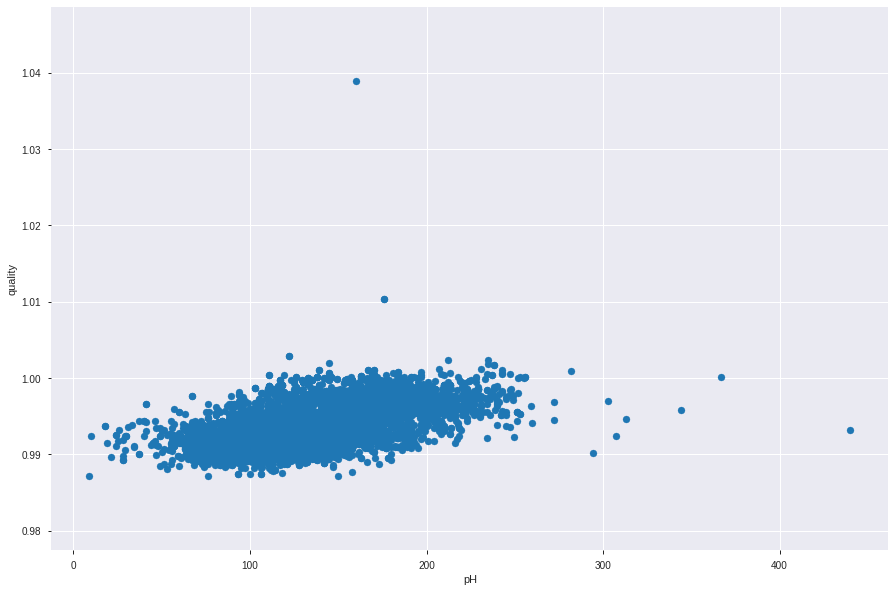

In [53]:
fig, ax = plt.subplots(figsize=fig_size)
plt.scatter(df["total sulfur dioxide"],df["density"])
plt.xlabel('pH')
plt.ylabel('quality')
plt.show()

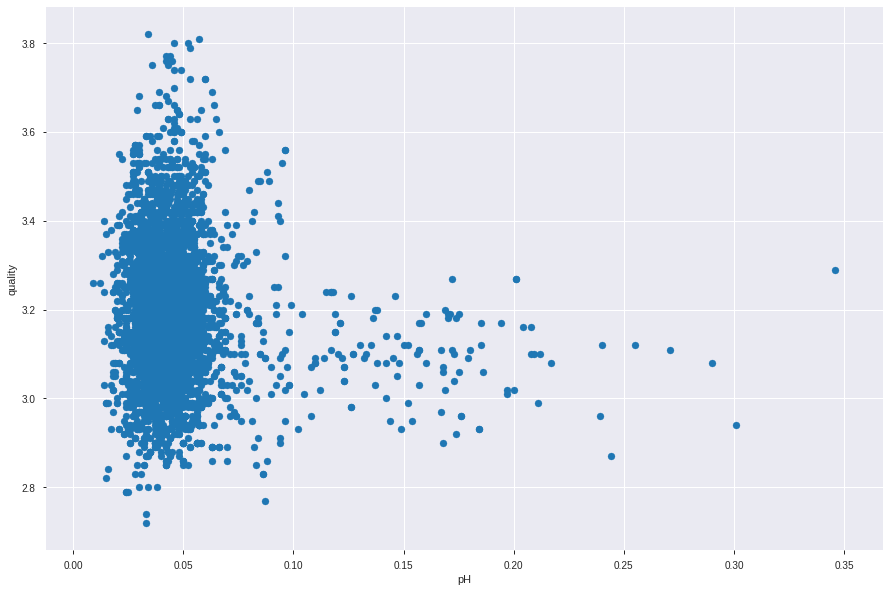

In [54]:
fig, ax = plt.subplots(figsize=fig_size)
plt.scatter(df["chlorides"],df["pH"])
plt.xlabel('pH')
plt.ylabel('quality')
plt.show()

# Matriz de correlação

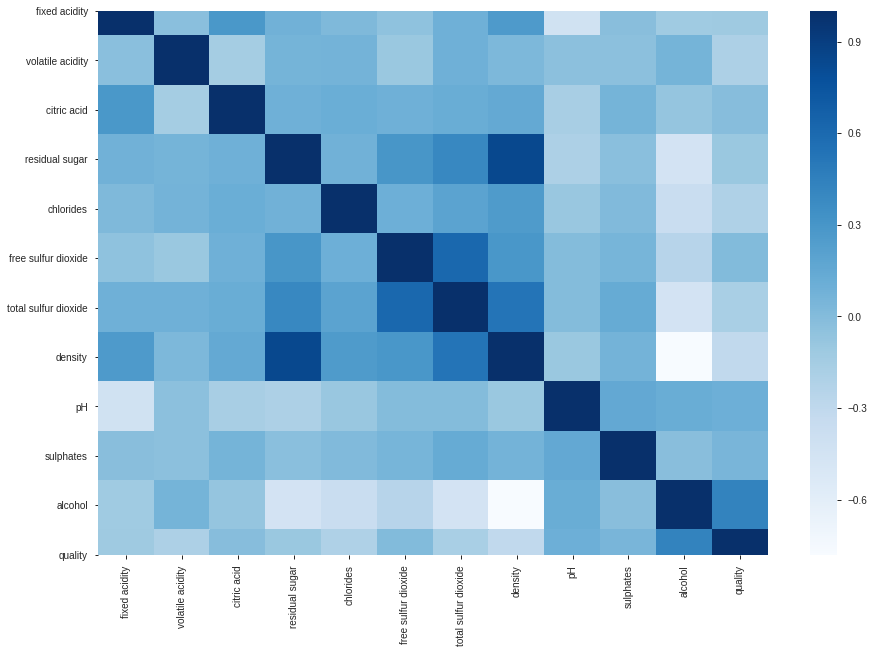

In [55]:
#Mapa de Correlação
plt.figure(figsize=fig_size)
sns.heatmap(df.corr(),cmap='Blues',annot=False) 
plt.show()

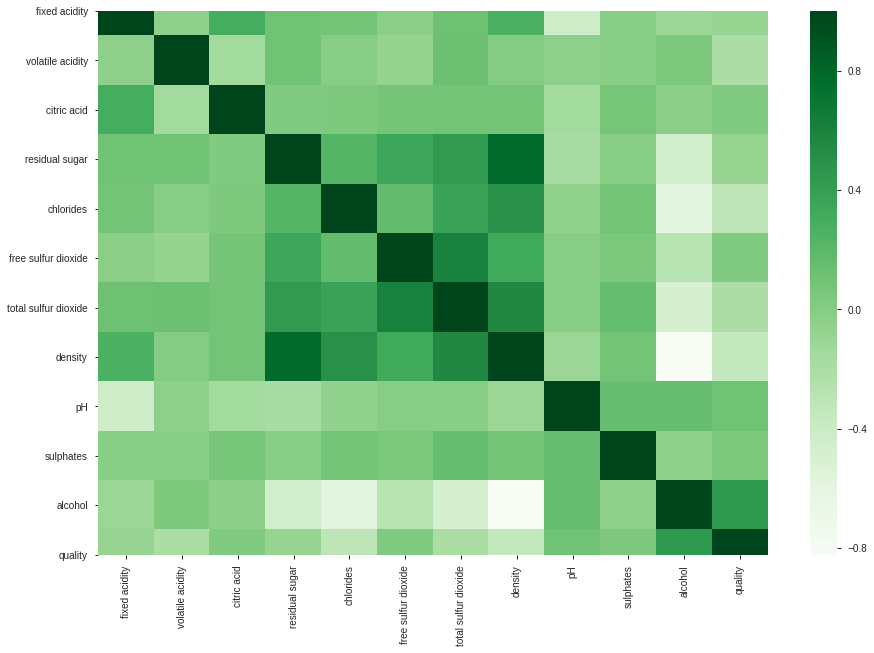

In [96]:
plt.figure(figsize=fig_size)
sns.heatmap(df.corr('spearman'),cmap='Greens',annot=False) 
plt.show()

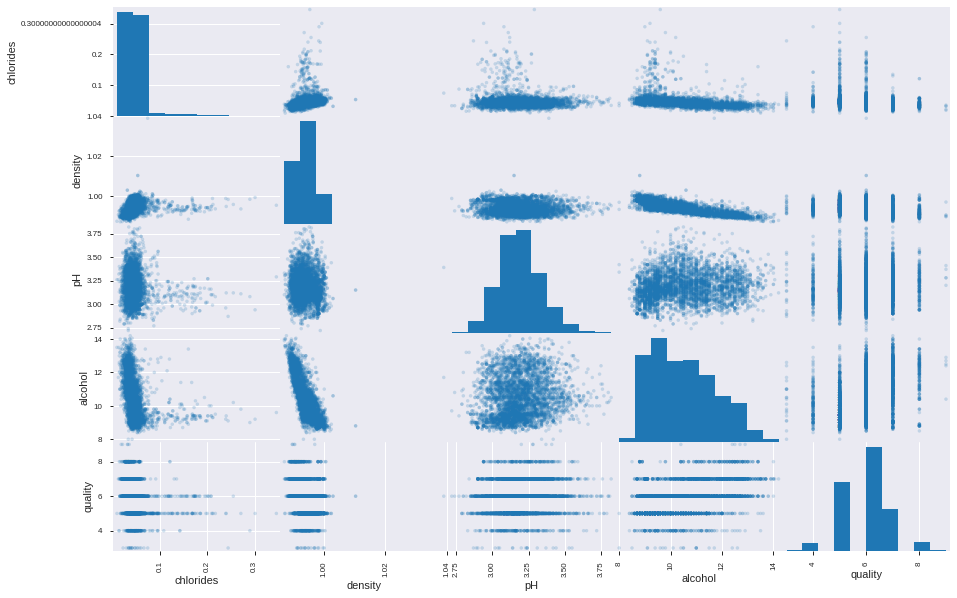

In [97]:
scatter_matrix(df[['chlorides', 'density', 'pH','alcohol', 'quality']], alpha=0.2,figsize = fig_size)
plt.show()

[]

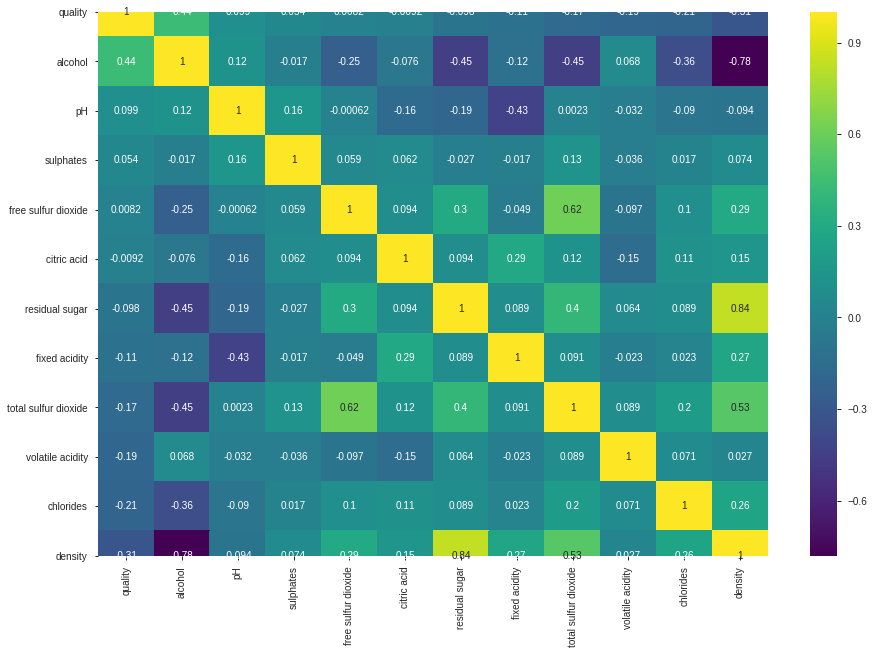

In [98]:
k = 12 #number of variables for heatmap
cols = df.corr().nlargest(k, 'quality')['quality'].index
cm = df[cols].corr()
plt.figure(figsize=fig_size)
sns.heatmap(cm, annot=True, cmap = 'viridis')
plt.plot()

In [99]:
df[['citric acid', 'chlorides', 'density', 'pH','alcohol', 'quality']]

citric acid  chlorides  density    pH  alcohol  quality
0            0.36      0.045  1.00100  3.00      8.8        6
1            0.34      0.049  0.99400  3.30      9.5        6
2            0.40      0.050  0.99510  3.26     10.1        6
3            0.32      0.058  0.99560  3.19      9.9        6
4            0.32      0.058  0.99560  3.19      9.9        6
...           ...        ...      ...   ...      ...      ...
4893         0.29      0.039  0.99114  3.27     11.2        6
4894         0.36      0.047  0.99490  3.15      9.6        5
4895         0.19      0.041  0.99254  2.99      9.4        6
4896         0.30      0.022  0.98869  3.34     12.8        7
4897         0.38      0.020  0.98941  3.26     11.8        6

[4898 rows x 6 columns]

<Figure size 1080x720 with 0 Axes>

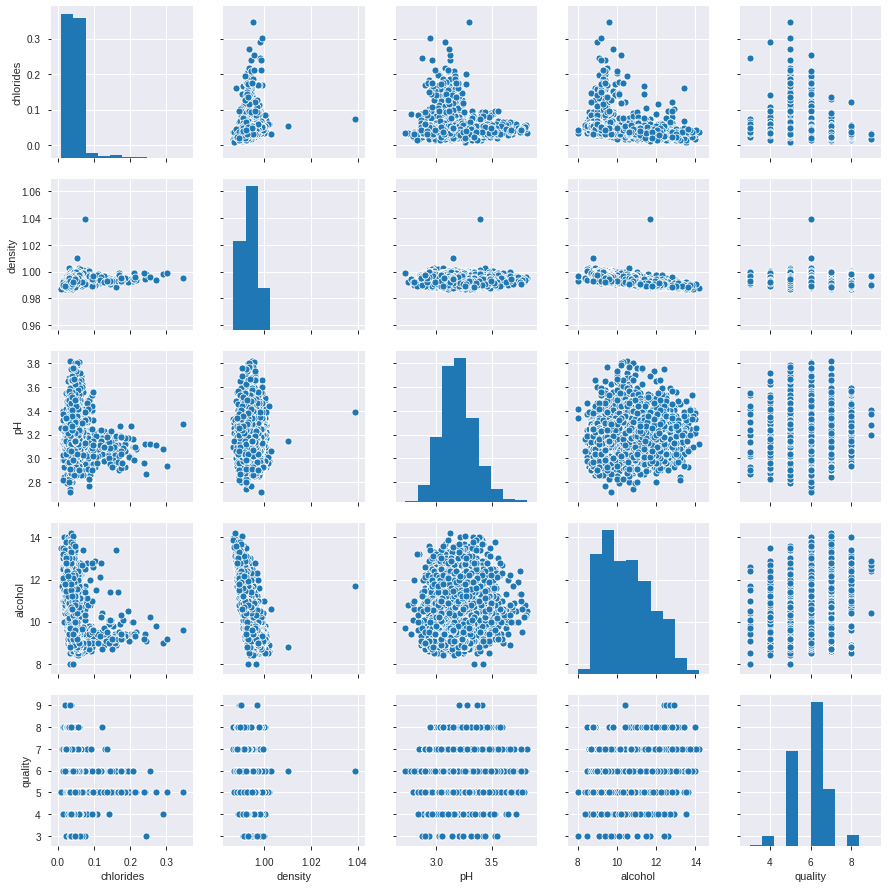

In [100]:
plt.figure(figsize=fig_size)
sns.pairplot(df[['chlorides', 'density', 'pH','alcohol', 'quality']])
plt.show()

In [101]:
iris = sns.load_dataset("iris")
iris.head(10)

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa

<Figure size 1080x720 with 0 Axes>

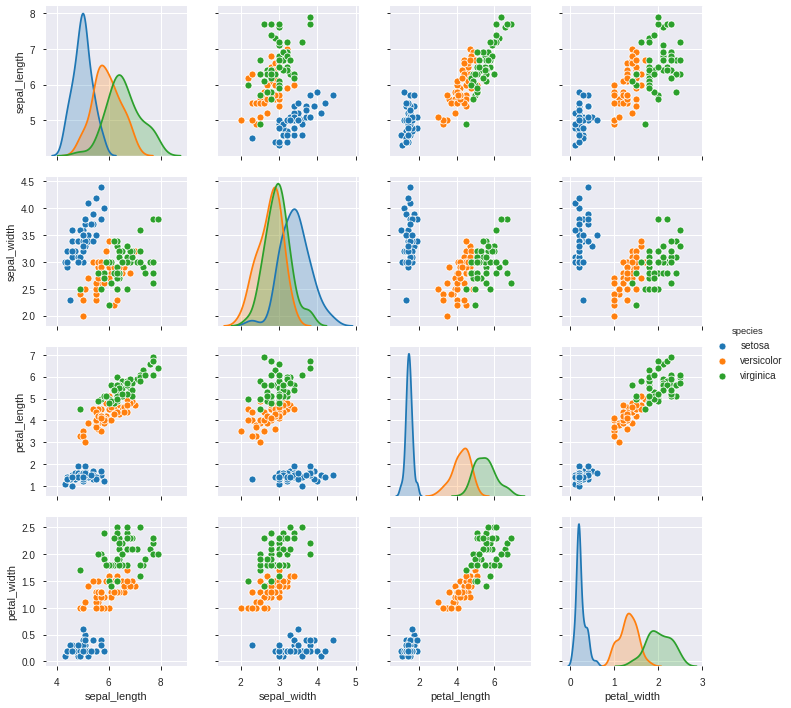

In [102]:
plt.figure(figsize=fig_size)
sns.pairplot(iris,hue="species")
plt.show()

In [103]:
df.profile_report()